In [1]:
import sqlite3
db_file = 'data/soccer/database.sqlite'
conn = sqlite3.connect(db_file)

In [2]:
q = '''SELECT League.name,Match.home_team_goal,Match.away_team_goal,Match.date 
                  FROM League INNER JOIN Match ON Match.league_id==League.id '''


In [3]:
import pandas as pd
df =  pd.read_sql(q,conn)

In [4]:
df.head()

,name,home_team_goal,away_team_goal,date
0,Belgium Jupiler League,1,1,2008-08-17 00:00:00
1,Belgium Jupiler League,0,0,2008-08-16 00:00:00
2,Belgium Jupiler League,0,3,2008-08-16 00:00:00
3,Belgium Jupiler League,5,0,2008-08-17 00:00:00
4,Belgium Jupiler League,1,3,2008-08-16 00:00:00


In [5]:
df['diff'] = (df['home_team_goal']-df['away_team_goal']).abs()


In [6]:
df.head()

,name,home_team_goal,away_team_goal,date,diff
0,Belgium Jupiler League,1,1,2008-08-17 00:00:00,0
1,Belgium Jupiler League,0,0,2008-08-16 00:00:00,0
2,Belgium Jupiler League,0,3,2008-08-16 00:00:00,3
3,Belgium Jupiler League,5,0,2008-08-17 00:00:00,5
4,Belgium Jupiler League,1,3,2008-08-16 00:00:00,2


In [7]:
df.sort_values(by='diff',ascending=False).head()

,name,home_team_goal,away_team_goal,date,diff
13898,Netherlands Eredivisie,10,0,2010-10-24 00:00:00,10
7660,France Ligue 1,0,9,2016-03-13 00:00:00,9
20161,Scotland Premier League,9,0,2010-11-06 00:00:00,9
9761,Germany 1. Bundesliga,8,0,2015-02-14 00:00:00,8
22984,Spain LIGA BBVA,8,0,2011-09-17 00:00:00,8


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

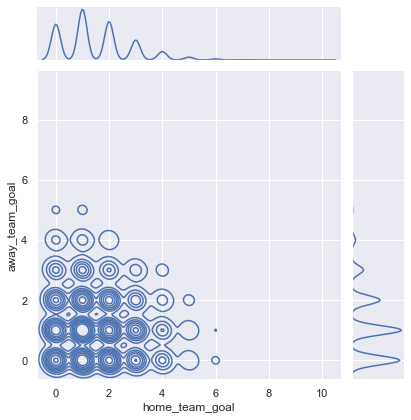

In [9]:
import seaborn as sns
sns.set(style="darkgrid")
sns.jointplot(x="home_team_goal",y="away_team_goal",kind="kde", data=df)